In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
#!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

In [7]:
data = pd.read_csv('/content/train.csv')

In [8]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,tt0086361,"['Drama', 'Music', 'Romance']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,tt0085970,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt0086200,"['Comedy', 'Crime', 'Drama']",0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data.shape

(88, 27)

In [10]:
img_width= 350
img_height = 350

X = []

for i in  tqdm(range(data.shape[0])):
  path = '/content/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path=path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)


100%|██████████| 88/88 [00:00<00:00, 296.70it/s]


In [11]:
X.shape

(88, 350, 350, 3)

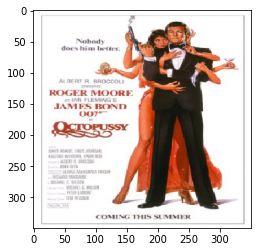

In [12]:
plt.imshow(X[1])

In [13]:
data['Genre'][1]

"['Action', 'Adventure', 'Thriller']"

In [14]:
y = data.drop(labels=['Id', 'Genre'],axis=1)
y = y.to_numpy()
y.shape

(88, 25)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [16]:
x_train[0].shape, y_train.shape

((350, 350, 3), (79, 25))

In [17]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(350,350,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [20]:
history = model.fit(x_train,y_train,batch_size=5,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
16/16 [==============================] - 0s 29ms/step - loss: 0.6441 - accuracy: 0.0633 - val_loss: 10.3272 - val_accuracy: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 0s 23ms/step - loss: 0.6549 - accuracy: 0.0886 - val_loss: 5.2975 - val_accuracy: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 0s 22ms/step - loss: 0.5819 - accuracy: 0.1266 - val_loss: 1.1777 - val_accuracy: 0.0000e+00
Epoch 4/50
16/16 [==============================] - 0s 23ms/step - loss: 0.5430 - accuracy: 0.2152 - val_loss: 0.9679 - val_accuracy: 0.1111
Epoch 5/50
16/16 [==============================] - 0s 22ms/step - loss: 0.5108 - accuracy: 0.2025 - val_loss: 0.9510 - val_accuracy: 0.0000e+00
Epoch 6/50
16/16 [==============================] - 0s 21ms/step - loss: 0.4800 - accuracy: 0.1899 - val_loss: 1.1804 - val_accuracy: 0.0000e+00
Epoch 7/50
16/16 [==============================] - 0s 22ms/step - loss: 0.4605 - accuracy: 0.2405 - val_loss: 1.3186 - val_accuracy:

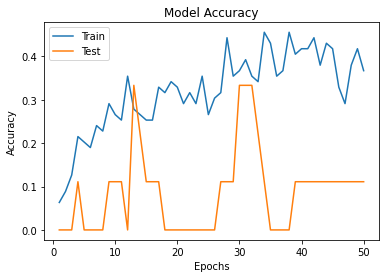

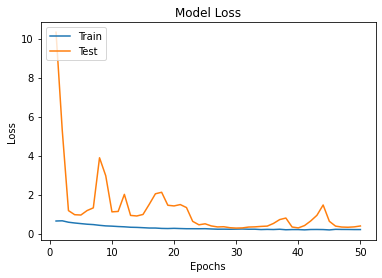

In [21]:
epochs_range = range(1,51)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

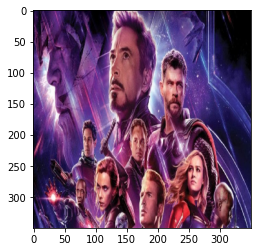

In [22]:
img = image.load_img(path='/content/Movies-Poster_Dataset/endgame.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

In [23]:
img = img.reshape(1, img_width, img_height, 3)

In [24]:
classes = data.columns[2:]

In [25]:
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
y_prob = model.predict(img)
top_3_predictions = np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
  print(classes[top_3_predictions[i]])

Drama
Biography
Horror
